# Data analysis for PID controller
---

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Import data from csv file, create headers for each column based on the LabView VI.
df = pd.read_csv('pid_square1.csv', index_col=False, skiprows=26, delimiter='\t',
                names=['time_s', 'goal_deg', 'true_deg', 'error', 'amp', 'freq_hz',
                         'sin0_or_sqr1', 'cmd_sig', 'controller'])
df.head()

,time_s,goal_deg,true_deg,error,amp,freq_hz,sin0_or_sqr1,cmd_sig,controller
0,0.015329,113.0,0.280103,112.713745,113.0,0.25,1.0,1124.751698,1.0
1,0.015829,113.0,0.286255,112.708395,113.0,0.25,1.0,1124.670793,1.0
2,0.016329,113.0,0.291605,112.703433,113.0,0.25,1.0,1124.635232,1.0
3,0.016829,113.0,0.296567,112.698142,113.0,0.25,1.0,1124.636268,1.0
4,0.017329,113.0,0.301858,112.692291,113.0,0.25,1.0,1124.669440,1.0


<Axes: xlabel='time_s'>

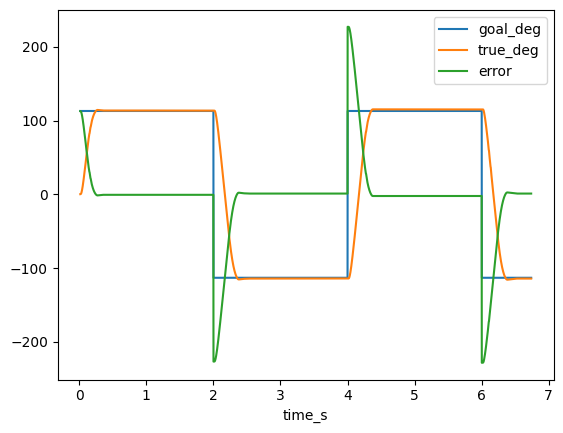

In [21]:
df.plot(x="time_s", y=['goal_deg', 'true_deg','error'])

<Axes: xlabel='time_s'>

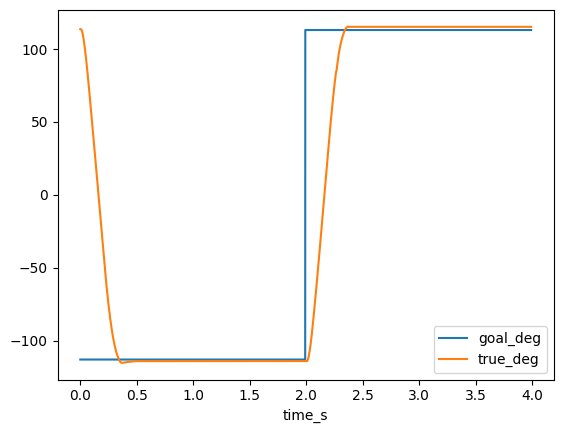

In [22]:
# Isolate one cycle
df = df[df['time_s'] > 2.01]
df = df[df['time_s'] < 6.0]

df['time_s'] = df['time_s'] - df['time_s'].min()

df.plot(x="time_s", y=['goal_deg', 'true_deg'])

In [23]:
# Mean, sdt, rms error
mean_error = np.mean(abs(df['error']))
std_error = np.std(df['error'])
rms_error = np.sqrt(np.mean(np.square(df['error'])))
print(f'mean: {mean_error} \nstd: {std_error} \nrms: {rms_error}')

mean: 20.584511707555553 
std: 56.13428200248095 
rms: 56.134387559795364


In [24]:
# Command statistics
command_mean = np.mean(abs(df['cmd_sig']))
command_std = np.std(df['cmd_sig'])
rms_command = np.sqrt(np.mean(np.square(df['cmd_sig'])))
print(f'mean: {command_mean} \nstd: {command_std} \nrms: {rms_command}')

mean: 199.14409312253966 
std: 548.2124295616879 
rms: 548.21352075365


In [25]:
# Find percent overshoot
max = df['true_deg'].max()
overshoot = max - df['goal_deg'].max()
pc_overshoot = max/df['goal_deg'].max()
print(overshoot, pc_overshoot)

2.2277229999999975 1.0197143628318583


In [26]:
# Rise time 90%
rise = 0.2992 # seconds

# Settling time
settling_time = 0.387 # seconds

<Axes: xlabel='time_s'>

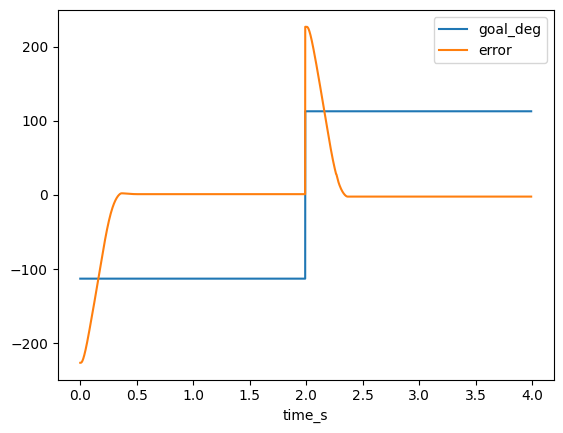

In [27]:
# Error plot
df.plot(x="time_s", y=['goal_deg', 'error'])